In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
train_data=pd.read_excel("Data_Train.xlsx")

In [3]:
pd.set_option('display.max_columns',None)

In [4]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
train_data.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [7]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [8]:
train_data.shape

(10683, 11)

In [9]:
train_data.dropna(inplace=True)

In [10]:
train_data.shape

(10682, 11)

In [11]:
train_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [12]:
train_data['Journey-Date']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
train_data['Journey-Month']=pd.to_datetime(train_data['Date_of_Journey'],format="%d/%m/%Y").dt.month
#only one year data taken so no need to extract

In [13]:
train_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey-Date,Journey-Month
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3


In [14]:
train_data.drop('Date_of_Journey',axis=1,inplace=True)

In [15]:
train_data.shape

(10682, 12)

In [16]:
train_data['Dep_hour']=pd.to_datetime(train_data['Dep_Time']).dt.hour
train_data['Dep_min']=pd.to_datetime(train_data['Dep_Time']).dt.minute


In [17]:
train_data.head()

,Airline,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey-Date,Journey-Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [18]:
train_data.drop("Dep_Time",axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey-Date,Journey-Month,Dep_hour,Dep_min
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50


In [19]:
train_data['Arrival_hour']=pd.to_datetime(train_data['Arrival_Time']).dt.hour
train_data['Arrival_minute']=pd.to_datetime(train_data['Arrival_Time']).dt.minute

In [20]:
train_data.head()

,Airline,Source,Destination,Route,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Journey-Date,Journey-Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,01:10 22 Mar,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,13:15,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,23:30,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,21:35,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [21]:
train_data.drop("Arrival_Time",axis=1,inplace=True)
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey-Date,Journey-Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35


In [22]:
duration=list(train_data['Duration'])
for i in range(len(duration)):
  if len(duration[i].split())!=2:
    if 'h' in duration[i]:
      duration[i]=duration[i].strip()+ " 0m"
    else:
      duration[i]="0h " + duration[i]
print(duration)
duration_hours=[]
duration_minutes=[]

for i in range(len(duration)):
  duration_hours.append(int(duration[i].split(sep='h')[0]))
  duration_minutes.append(int(duration[i].split(sep='m')[0].split()[-1]))

['2h 50m', '7h 25m', '19h 0m', '5h 25m', '4h 45m', '2h 25m', '15h 30m', '21h 5m', '25h 30m', '7h 50m', '13h 15m', '2h 35m', '2h 15m', '12h 10m', '2h 35m', '26h 35m', '4h 30m', '22h 35m', '23h 0m', '20h 35m', '5h 10m', '15h 20m', '2h 50m', '2h 55m', '13h 20m', '15h 10m', '5h 45m', '5h 55m', '2h 50m', '2h 15m', '2h 15m', '13h 25m', '2h 50m', '22h 0m', '5h 30m', '10h 25m', '5h 15m', '2h 30m', '6h 15m', '11h 55m', '11h 5m', '8h 30m', '22h 5m', '2h 45m', '12h 0m', '2h 50m', '2h 50m', '2h 15m', '16h 5m', '19h 55m', '3h 15m', '25h 20m', '2h 50m', '3h 0m', '2h 50m', '16h 15m', '15h 5m', '2h 15m', '6h 30m', '25h 5m', '12h 25m', '27h 20m', '10h 15m', '10h 30m', '2h 15m', '10h 25m', '2h 50m', '1h 30m', '13h 20m', '2h 15m', '1h 25m', '26h 30m', '7h 20m', '13h 30m', '5h 0m', '2h 45m', '2h 50m', '1h 30m', '19h 5m', '2h 15m', '14h 50m', '2h 40m', '22h 10m', '9h 35m', '10h 0m', '21h 20m', '5h 25m', '18h 45m', '12h 20m', '18h 0m', '9h 15m', '11h 5m', '17h 30m', '13h 20m', '2h 35m', '2h 25m', '2h 40m', 

In [23]:
train_data["Duration_hours"]=duration_hours
train_data["Duration_minutes"]=duration_minutes

In [24]:
train_data.head()

,Airline,Source,Destination,Route,Duration,Total_Stops,Additional_Info,Price,Journey-Date,Journey-Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,2h 50m,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,7h 25m,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,19h,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,5h 25m,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,4h 45m,1 stop,No info,13302,1,3,16,50,21,35,4,45


In [25]:
train_data.drop("Duration",axis=1,inplace=True)

In [26]:
train_data.head()

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Price,Journey-Date,Journey-Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,BLR → DEL,non-stop,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,CCU → IXR → BBI → BLR,2 stops,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,DEL → LKO → BOM → COK,2 stops,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,CCU → NAG → BLR,1 stop,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,BLR → NAG → DEL,1 stop,No info,13302,1,3,16,50,21,35,4,45


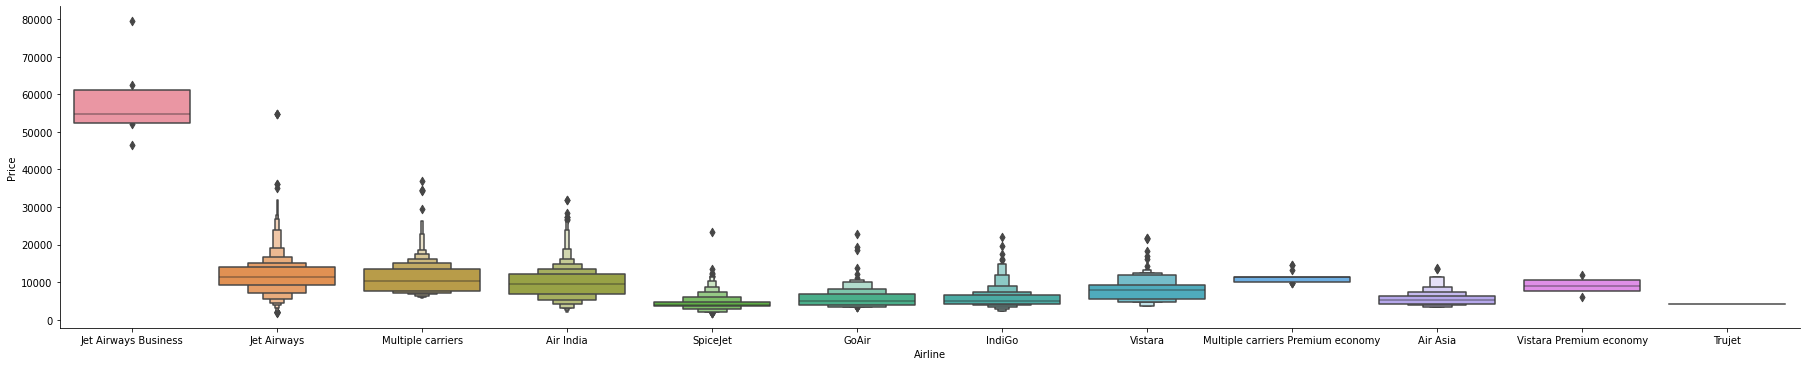

In [27]:
sns.catplot(x='Airline',y='Price',data=train_data.sort_values('Price',ascending=False),aspect=5,kind="boxen")

In [28]:
airline_encoded=pd.get_dummies(train_data['Airline'],drop_first=True)

In [29]:
airline_encoded.head()

,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy
0,0,0,1,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,1,0,0,0,0,0,0,0
3,0,0,1,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0


In [30]:
source_encoded=pd.get_dummies(train_data['Source'],drop_first=True)

In [31]:
source_encoded.head()

,Chennai,Delhi,Kolkata,Mumbai
0,0,0,0,0
1,0,0,1,0
2,0,1,0,0
3,0,0,1,0
4,0,0,0,0


In [32]:
destination_encoded=pd.get_dummies(train_data['Destination'],drop_first=True)
destination_encoded.head()

,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,0,0,0,1
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1


In [33]:
#route col and total stops coloumn is similar and additional info has no info in many rows
train_data.drop('Route',axis=1,inplace=True)

In [34]:
train_data['Total_Stops'].value_counts()

1 stop      5625
non-stop    3491
2 stops     1520
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [35]:
train_data.replace({'non-stop':0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [36]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Additional_Info,Price,Journey-Date,Journey-Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,No info,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,No info,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,No info,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,No info,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,No info,13302,1,3,16,50,21,35,4,45


In [37]:
train_data.drop('Additional_Info',axis=1,inplace=True)

In [38]:
train_data.head()

,Airline,Source,Destination,Total_Stops,Price,Journey-Date,Journey-Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45


In [39]:
data_train=pd.concat([train_data,airline_encoded,source_encoded,destination_encoded],axis=1)

In [40]:
data_train.head()

,Airline,Source,Destination,Total_Stops,Price,Journey-Date,Journey-Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,IndiGo,Banglore,New Delhi,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,Air India,Kolkata,Banglore,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,Jet Airways,Delhi,Cochin,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,IndiGo,Kolkata,Banglore,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,IndiGo,Banglore,New Delhi,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [41]:
data_train.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [42]:
data_train.head()

,Total_Stops,Price,Journey-Date,Journey-Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,3897,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,7662,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,13882,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,6218,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,13302,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [43]:
data_train.shape

(10682, 30)

In [44]:
test_data=pd.read_excel("Test_set.xlsx")
test_data.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info


In [45]:
test_data.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [46]:
test_data['Journey-Date']=pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.day
test_data['Journey-Month']=pd.to_datetime(test_data['Date_of_Journey'],format="%d/%m/%Y").dt.month
#only one year data taken so no need to extract

test_data.drop('Date_of_Journey',axis=1,inplace=True)

test_data['Dep_hour']=pd.to_datetime(test_data['Dep_Time']).dt.hour
test_data['Dep_min']=pd.to_datetime(test_data['Dep_Time']).dt.minute

test_data.drop('Dep_Time',axis=1,inplace=True)

test_data['Arrival_hour']=pd.to_datetime(test_data['Arrival_Time']).dt.hour
test_data['Arrival_minute']=pd.to_datetime(test_data['Arrival_Time']).dt.minute

test_data.drop('Arrival_Time',axis=1,inplace=True)

duration_test=list(test_data['Duration'])
for i in range(len(duration_test)):
  if len(duration_test[i].split())!=2:
    if 'h' in duration_test[i]:
      duration_test[i]=duration_test[i].strip()+ " 0m"
    else:
      duration_test[i]="0h " + duration_test[i]
print(duration_test)
duration_test_hours=[]
duration_test_minutes=[]

for i in range(len(duration_test)):
  duration_test_hours.append(int(duration_test[i].split(sep='h')[0]))
  duration_test_minutes.append(int(duration_test[i].split(sep='m')[0].split()[-1]))

test_data["Duration_hours"]=duration_test_hours
test_data["Duration_minutes"]=duration_test_minutes

test_data.drop("Duration",axis=1,inplace=True)

test_data.head()


['10h 55m', '4h 0m', '23h 45m', '13h 0m', '2h 50m', '18h 20m', '15h 5m', '5h 15m', '2h 45m', '6h 5m', '28h 55m', '9h 20m', '10h 15m', '4h 40m', '17h 20m', '10h 50m', '9h 15m', '12h 15m', '9h 10m', '9h 20m', '14h 50m', '14h 5m', '11h 35m', '13h 30m', '2h 50m', '12h 25m', '2h 30m', '25h 30m', '19h 25m', '7h 0m', '2h 30m', '11h 40m', '7h 5m', '3h 0m', '1h 25m', '2h 40m', '1h 25m', '6h 5m', '17h 5m', '10h 40m', '2h 30m', '12h 30m', '1h 30m', '23h 40m', '5h 15m', '2h 20m', '23h 35m', '1h 30m', '27h 40m', '13h 30m', '28h 20m', '5h 45m', '26h 25m', '5h 40m', '2h 15m', '2h 55m', '5h 45m', '7h 30m', '5h 20m', '25h 50m', '13h 15m', '26h 20m', '5h 45m', '5h 40m', '2h 40m', '2h 50m', '5h 25m', '8h 45m', '3h 0m', '7h 20m', '1h 30m', '21h 10m', '16h 0m', '7h 50m', '1h 30m', '3h 0m', '2h 50m', '19h 25m', '2h 55m', '14h 5m', '2h 50m', '16h 5m', '5h 55m', '2h 30m', '10h 15m', '13h 50m', '2h 15m', '11h 55m', '2h 30m', '13h 20m', '18h 10m', '28h 10m', '5h 0m', '23h 15m', '1h 15m', '1h 20m', '13h 25m', '6

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,Journey-Date,Journey-Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,21,5,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,21,5,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,24,6,23,55,2,45,2,50


In [47]:
airline_test_encoded=pd.get_dummies(test_data['Airline'],drop_first=True)
source_test_encoded=pd.get_dummies(test_data['Source'],drop_first=True)
destination_test_encoded=pd.get_dummies(test_data['Destination'],drop_first=True)


test_data.drop('Route',axis=1,inplace=True)
test_data.replace({'non-stop':0,"1 stop":1,"2 stops":2,"3 stops":3,"4 stops":4},inplace=True)
test_data.drop('Additional_Info',axis=1,inplace=True)

data_test=pd.concat([test_data,airline_test_encoded,source_test_encoded,destination_test_encoded],axis=1)
data_test.drop(['Airline','Source','Destination'],axis=1,inplace=True)

In [48]:
data_test.head()

,Total_Stops,Journey-Date,Journey-Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,1,6,6,17,30,4,25,10,55,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
1,1,12,5,6,20,10,20,4,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,1,21,5,19,15,19,0,23,45,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,21,5,8,0,21,0,13,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0
4,0,24,6,23,55,2,45,2,50,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [49]:
X=data_train.drop('Price',axis=1)
Y=data_train['Price']
X.head()

,Total_Stops,Journey-Date,Journey-Month,Dep_hour,Dep_min,Arrival_hour,Arrival_minute,Duration_hours,Duration_minutes,Air India,GoAir,IndiGo,Jet Airways,Jet Airways Business,Multiple carriers,Multiple carriers Premium economy,SpiceJet,Trujet,Vistara,Vistara Premium economy,Chennai,Delhi,Kolkata,Mumbai,Cochin,Delhi,Hyderabad,Kolkata,New Delhi
0,0,24,3,22,20,1,10,2,50,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1,2,1,5,5,50,13,15,7,25,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
2,2,9,6,9,25,4,25,19,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0
3,1,12,5,18,5,23,30,5,25,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0
4,1,1,3,16,50,21,35,4,45,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [50]:
Y.head()

0     3897
1     7662
2    13882
3     6218
4    13302
Name: Price, dtype: int64

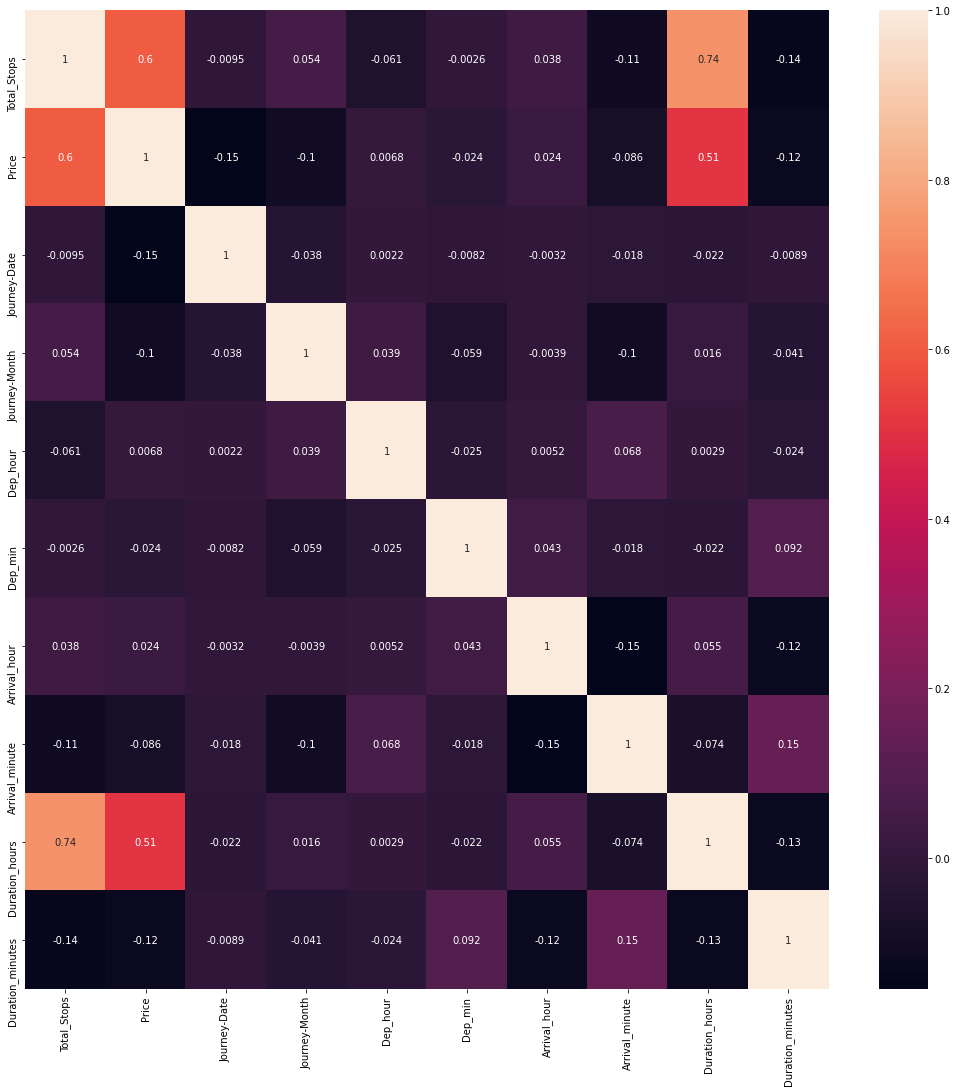

In [51]:
plt.figure(figsize=(18,18))
sns.heatmap(train_data.corr(),annot=True)
plt.show()

In [52]:
from sklearn.ensemble import ExtraTreesRegressor
selection=ExtraTreesRegressor()
selection.fit(X,Y)

ExtraTreesRegressor(bootstrap=False, ccp_alpha=0.0, criterion='mse',
                    max_depth=None, max_features='auto', max_leaf_nodes=None,
                    max_samples=None, min_impurity_decrease=0.0,
                    min_impurity_split=None, min_samples_leaf=1,
                    min_samples_split=2, min_weight_fraction_leaf=0.0,
                    n_estimators=100, n_jobs=None, oob_score=False,
                    random_state=None, verbose=0, warm_start=False)

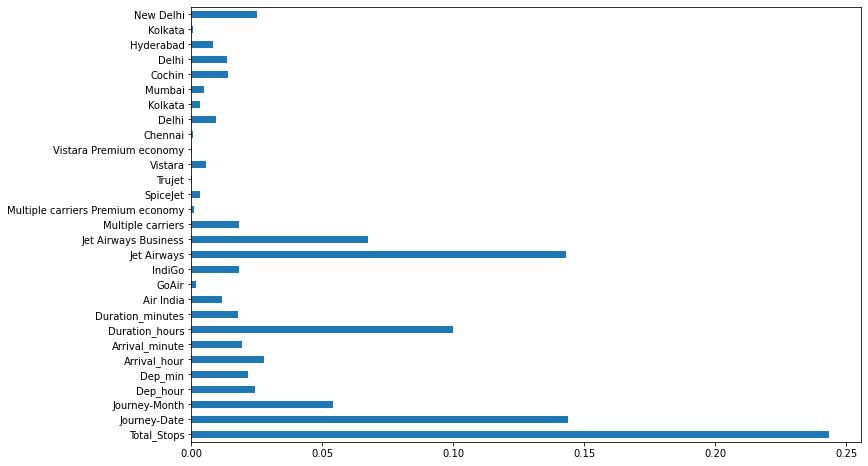

In [53]:
 plt.figure(figsize=(12,8))
 s=pd.Series(selection.feature_importances_,index=X.columns)
s.plot(kind='barh')
plt.show()

In [54]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test= train_test_split(X,Y,test_size=0.2,random_state=42)


In [55]:
from sklearn.ensemble import RandomForestRegressor
reg_rf=RandomForestRegressor()
reg_rf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [56]:
y_pred=reg_rf.predict(X_test)

In [57]:
reg_rf.score(X_train,y_train)

0.9532320741921679

In [58]:
reg_rf.score(X_test,y_test)

0.7976548898339006

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


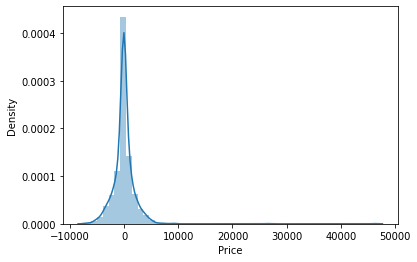

In [59]:
sns.distplot(y_test-y_pred)
plt.show()

In [60]:
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred)

4362976.662320157

In [61]:
from sklearn.model_selection import RandomizedSearchCV

In [63]:
max_features=['auto','sqrt']
n_estimators=[int(x) for x in np.linspace(start=100,stop=1200,num=12)]
max_depth=[int(x) for x in np.linspace(5,30,5)]
min_samples_split=[2,5,10,15,50,100]
min_samples_leaf=[1,2,5,10]

In [66]:
random_grid={'n_estimators':n_estimators,
              'max_features':max_features,
              'max_depth':max_depth,
              'min_samples_split':min_samples_split,
              'min_samples_leaf':min_samples_leaf}

In [70]:
rf_random=RandomizedSearchCV(estimator=reg_rf,param_distributions=random_grid,n_iter=10,cv=5,verbose=2,scoring='neg_mean_squared_error',random_state=42,n_jobs=1)

In [71]:
rf_random.fit(X_train,y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=11 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=11, total=  13.0s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=11 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   13.0s remaining:    0.0s


[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=11, total=  12.4s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=11 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=11, total=  12.4s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=11 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=11, total=  12.5s
[CV] n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=11 
[CV]  n_estimators=900, min_samples_split=100, min_samples_leaf=10, max_features=auto, max_depth=11, total=  12.2s
[CV] n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=17 
[CV]  n_estimators=1100, min_samples_split=100, min_samples_leaf=2, max_features=auto, max_depth=17, total=  16.8s
[CV] n_estimators=1100, m

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:  5.0min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=RandomForestRegressor(bootstrap=True,
                                                   ccp_alpha=0.0,
                                                   criterion='mse',
                                                   max_depth=None,
                                                   max_features='auto',
                                                   max_leaf_nodes=None,
                                                   max_samples=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   n_estimators=100,
                              

In [72]:
rf_random.best_params_

{'max_depth': 17,
 'max_features': 'auto',
 'min_samples_leaf': 2,
 'min_samples_split': 5,
 'n_estimators': 300}

In [73]:
new_pred=rf_random.predict(X_test)

In [75]:
from sklearn import metrics
metrics.mean_squared_error(y_test,new_pred)

3985948.163123067

In [77]:
from sklearn import metrics
metrics.r2_score(y_test,new_pred)

0.8151406292981187

In [79]:
import pickle
filename='Flight_Fare.pkl'
pickle.dump(rf_random, open(filename, 'wb'))